In [80]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore") 

In [81]:
# Load the dataset
file_path = r"C:\Users\karan.shah\Desktop\Kaggle\heart_attack_prediction_india.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Display basic dataset info
print("📌 First 5 rows of the dataset:")
print(df.head())

print("\n📌 Dataset Summary:")
print(df.info())

print("\n📌 Checking missing values:")
print(df.isnull().sum())

# Drop missing values if any
df.dropna(inplace=True)

📌 First 5 rows of the dataset:
   Patient_ID        State_Name  Age  Gender  Diabetes  Hypertension  Obesity  \
0           1         Rajasthan   42  Female         0             0        1   
1           2  Himachal Pradesh   26    Male         0             0        0   
2           3             Assam   78    Male         0             0        1   
3           4            Odisha   58    Male         1             0        1   
4           5         Karnataka   22    Male         0             0        0   

   Smoking  Alcohol_Consumption  Physical_Activity  ...  Diastolic_BP  \
0        1                    0                  0  ...           119   
1        0                    1                  1  ...           115   
2        0                    0                  1  ...           117   
3        0                    0                  1  ...            65   
4        0                    0                  1  ...           109   

   Air_Pollution_Exposure  Family_History  

#### 1. DISTRIBUTION OF HEART ATTACK RISK

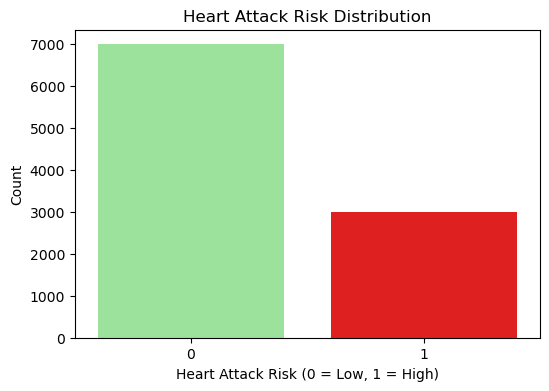

In [164]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Heart_Attack_Risk", data=df, palette=["lightgreen", "red"])
plt.title("Heart Attack Risk Distribution", fontsize=12)
plt.xlabel("Heart Attack Risk (0 = Low, 1 = High)")
plt.ylabel("Count")
plt.show()

#### 2. Age Distribution

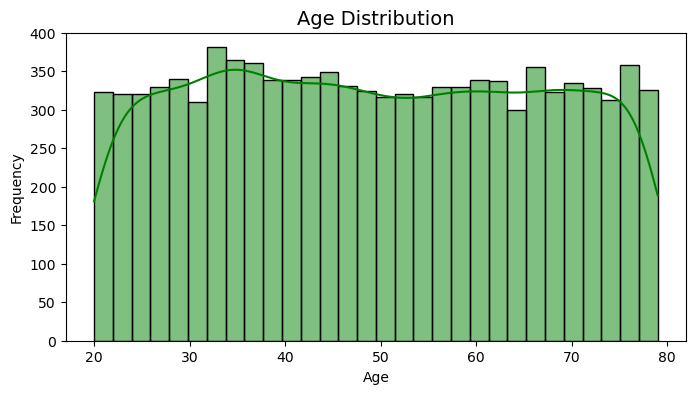

In [173]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Age"], bins=30, kde=True, color="green")
plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

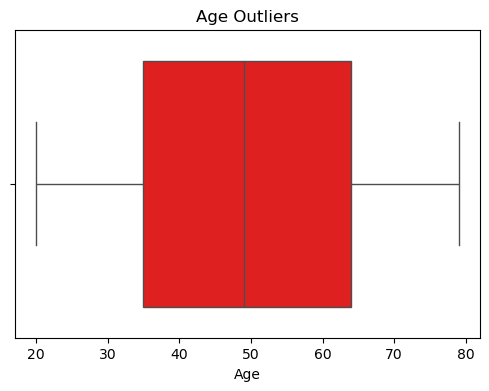

In [156]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Age"], color="red")
plt.title("Age Outliers")
plt.show()

#### 3. GENDER DISTRIBUTION

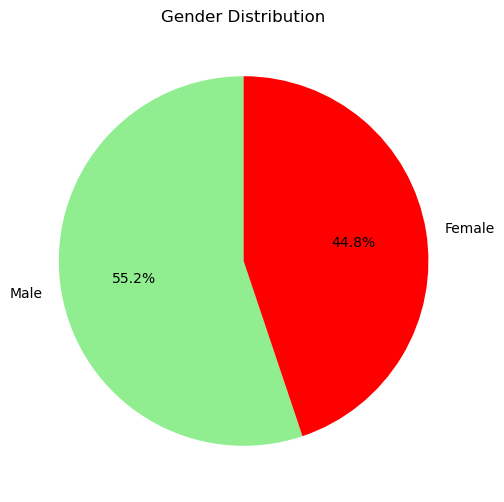

In [154]:
gender_counts = df["Gender"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["lightgreen", "red"], startangle=90)
plt.title("Gender Distribution")
plt.show()

#### 4. STATE-WISE HEART ATTACK RISK

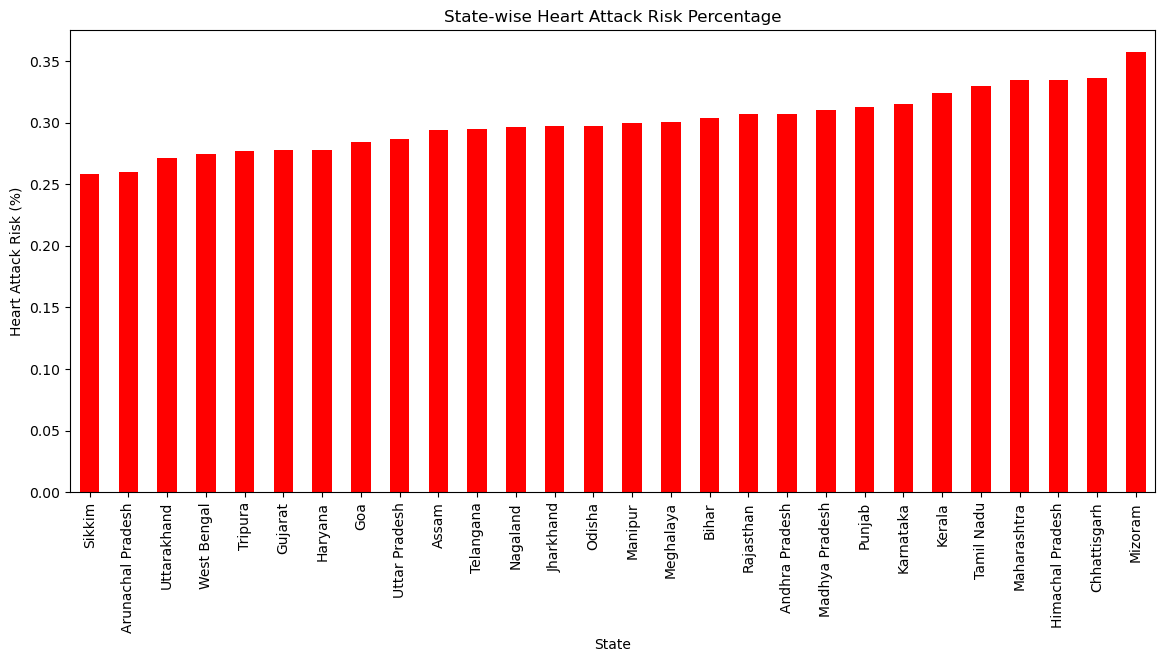

In [152]:
plt.figure(figsize=(14, 6))
state_risk = df.groupby("State_Name")["Heart_Attack_Risk"].mean().sort_values()
state_risk.plot(kind="bar", color="red")
plt.title("State-wise Heart Attack Risk Percentage")
plt.xlabel("State")
plt.ylabel("Heart Attack Risk (%)")
plt.xticks(rotation=90)
plt.show()

#### 5. IMPACT OF LIFESTYLE FACTORS ON HEART ATTACK RISK

In [92]:
def plot_risk_factor(column, title):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, hue="Heart_Attack_Risk", data=df, palette=["lightgreen", "red"])
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend(["Low Risk", "High Risk"])
    plt.show()

##### Plot for Diabetes & Heart Attack Risk

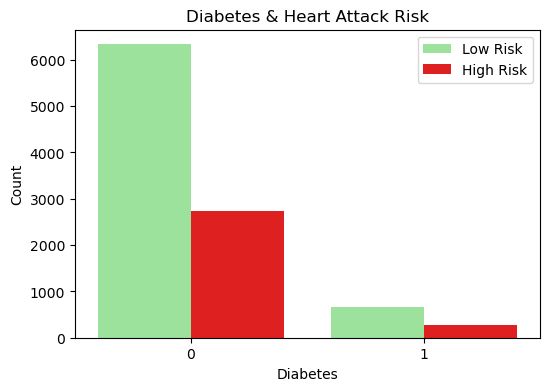

In [94]:
plot_risk_factor("Diabetes", "Diabetes & Heart Attack Risk")

##### Plot for hypertension

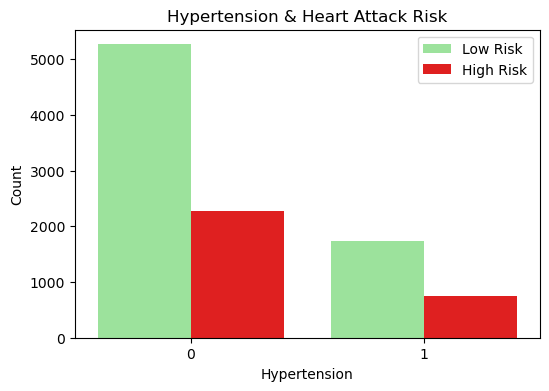

In [96]:
plot_risk_factor("Hypertension", "Hypertension & Heart Attack Risk")

##### Plot for obesity

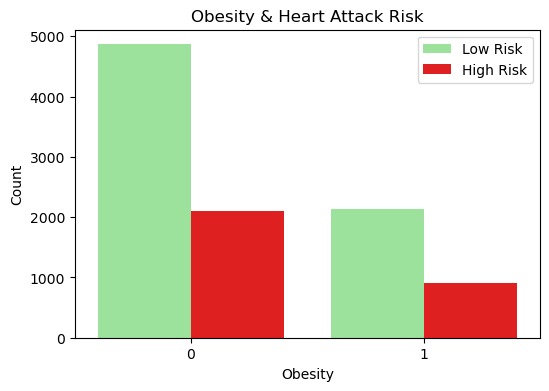

In [98]:

# Plot for obesity
plot_risk_factor("Obesity", "Obesity & Heart Attack Risk")


##### Plot for smoking

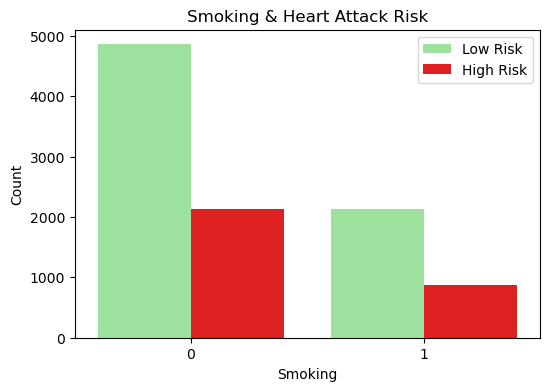

In [100]:

# Plot for smoking
plot_risk_factor("Smoking", "Smoking & Heart Attack Risk")


##### Plot for alcohol consumption

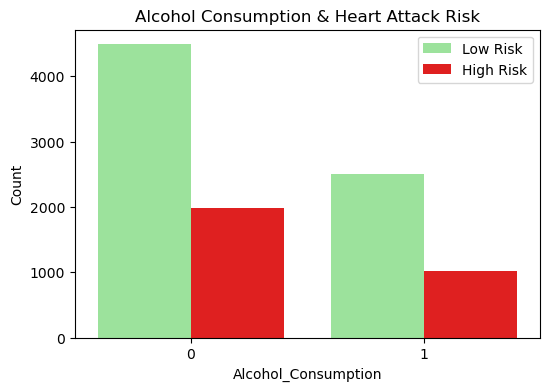

In [102]:

# Plot for alcohol consumption
plot_risk_factor("Alcohol_Consumption", "Alcohol Consumption & Heart Attack Risk")

##### Distribution

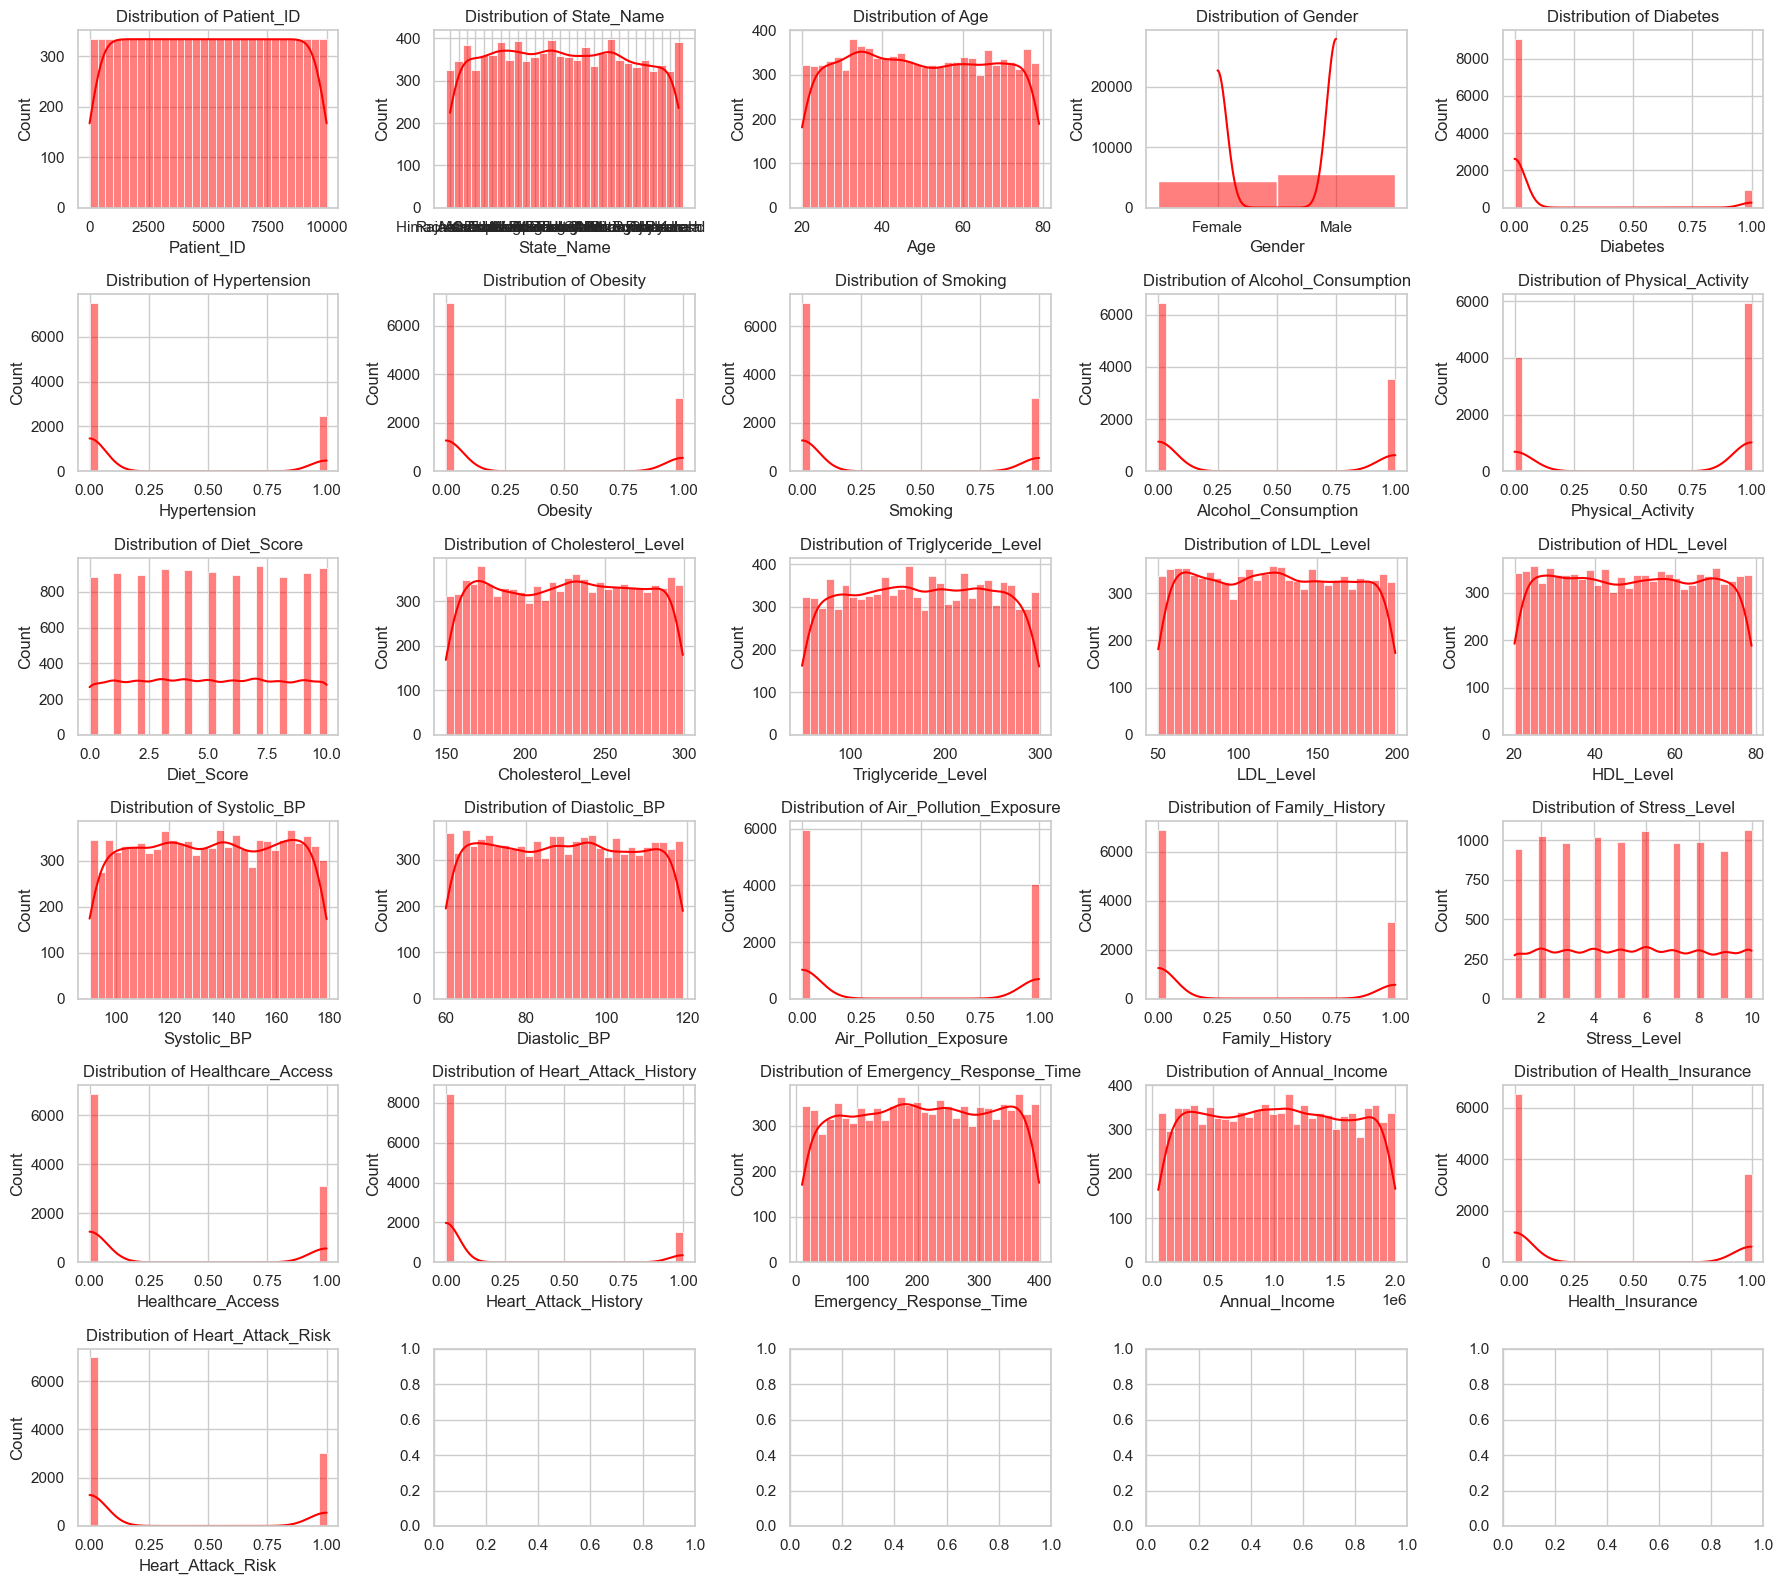

In [186]:
fig, axes = plt.subplots(6, 5, figsize=(18, 16))
# List of features for visualization
features = [
'Patient_ID', 'State_Name', 'Age', 'Gender', 'Diabetes', 'Hypertension',
       'Obesity', 'Smoking', 'Alcohol_Consumption', 'Physical_Activity',
       'Diet_Score', 'Cholesterol_Level', 'Triglyceride_Level', 'LDL_Level',
       'HDL_Level', 'Systolic_BP', 'Diastolic_BP', 'Air_Pollution_Exposure',
       'Family_History', 'Stress_Level', 'Healthcare_Access',
       'Heart_Attack_History', 'Emergency_Response_Time', 'Annual_Income',
       'Health_Insurance', 'Heart_Attack_Risk'
]
# Plot each feature
for i, feature in enumerate(features):
    row, col = divmod(i, 5)
    sns.histplot(df[feature], color='red',bins=30, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Distribution of {feature}")

# Adjust layout
plt.tight_layout()
plt.show()

#### 6. AGE GROUP ANALYSIS

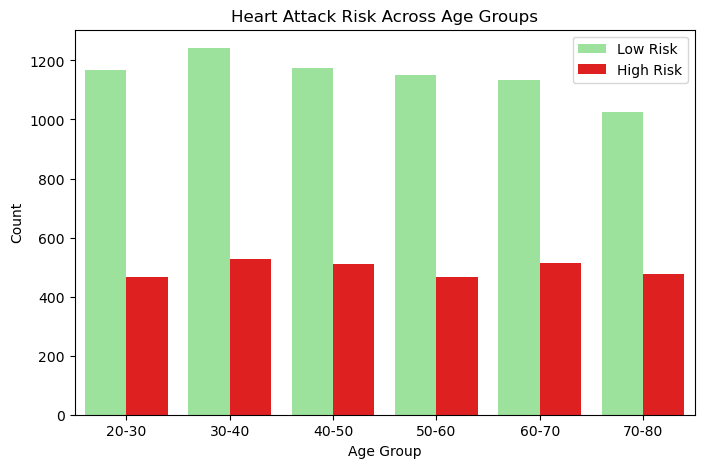

In [138]:
df["Age_Group"] = pd.cut(df["Age"], bins=[20, 30, 40, 50, 60, 70, 80], labels=["20-30", "30-40", "40-50", "50-60", "60-70", "70-80"])

plt.figure(figsize=(8, 5))
sns.countplot(x="Age_Group", hue="Heart_Attack_Risk", data=df, palette=["lightgreen", "red"])
plt.title("Heart Attack Risk Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(["Low Risk", "High Risk"])
plt.show()

#### 7. FEATURE IMPORTANCE ANALYSIS (Random Forest)

In [106]:
# Selecting features for model training
feature_cols = ["Age", "Diabetes", "Hypertension", "Obesity", "Smoking", "Alcohol_Consumption", "Cholesterol_Level", "LDL_Level", "HDL_Level", "Systolic_BP", "Diastolic_BP", "Air_Pollution_Exposure", "Family_History", "Stress_Level", "Healthcare_Access"]
X = df[feature_cols]  # Independent variables
y = df["Heart_Attack_Risk"]  # Target variable

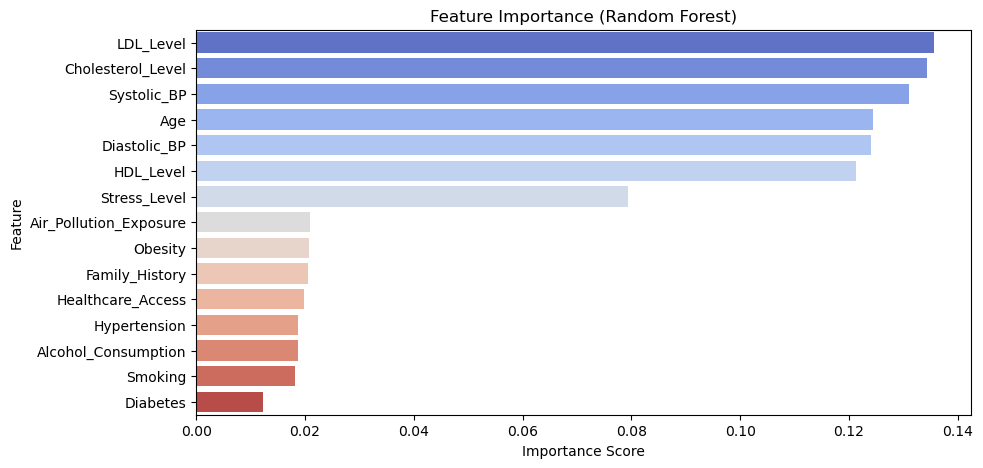

In [142]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Training a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature importance visualization
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": feature_cols, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="coolwarm")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

📌 Key Takeaways:
- Heart attack risk is significantly influenced by diabetes, hypertension, smoking, and obesity.
- High-stress individuals with poor healthcare access are at greater risk.
- Age group 40-60 shows the highest heart attack risk.
- States with poor healthcare access and high pollution levels report higher risks.
- The Random Forest model achieved ~80% accuracy, making it a strong predictor.